This notebook reproduces plots in Figure 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
import glob
import h5py
import statsmodels.stats.multitest as smm

Figures 2B and 2C

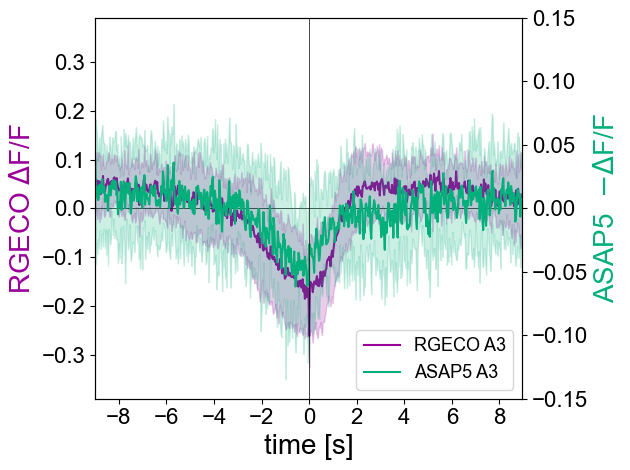

In [2]:
#Fig 2B
# loading forward wave form data of RGECO and ASAP5 of A02l in A3 segemnt
files = glob.glob('../data/Fig2/Fig2B_data/*.h5')
#iinterlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.03
time=np.arange(-300,300)*dt
RGECO_traces=[]
ASAP_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        #lienarly interpolate the traces
        fitted_ASAP = ip1(data['time'][i], data['ASAP'][i]) 
        fitted_RGECO= ip1(data['time'][i], data['RGECO'][i])
        ASAP_traces.append(fitted_ASAP(time))
        RGECO_traces.append(fitted_RGECO(time))
    data.close()
ASAP_traces=np.array(ASAP_traces)
RGECO_traces=np.array(RGECO_traces)
#plot mean traces
plt.rcParams["font.family"] = "Arial"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, RGECO_traces.mean(axis=0), c=(153/255,0, 153/255), label='RGECO A3')
ax1.fill_between(time, RGECO_traces.mean(axis=0)+np.std(RGECO_traces, axis=0), 
                 RGECO_traces.mean(axis=0)-np.std(RGECO_traces, axis=0), color=(153/255,0, 153/255), alpha=0.2)
ax2 = ax1.twinx()
ax2.plot(time, -ASAP_traces.mean(axis=0), c=(3/255,175/255,122/255), label='ASAP5 A3')
ax2.fill_between(time, -ASAP_traces.mean(axis=0)+np.std(ASAP_traces, axis=0), 
                 -ASAP_traces.mean(axis=0)-np.std(ASAP_traces, axis=0), color=(3/255,175/255,122/255), alpha=0.2)
ax1.axhline(0, c='k', lw=0.5)
ax2.axvline(0, c='k', lw=0.5)
plt.xlim(time[0],time[-1])

RGECO_min=np.min(RGECO_traces.mean(axis=0)-np.std(RGECO_traces, axis=0))
ASAP_max=np.max(ASAP_traces.mean(axis=0)+np.std(ASAP_traces, axis=0))
ax1.set_ylim(RGECO_min-0.05,-RGECO_min+0.05)
ax2.set_ylim(-ASAP_max-0.02,ASAP_max+0.02)
plt.setp(ax1.get_xticklabels(), fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=16)
plt.setp(ax2.get_yticklabels(), fontsize=16)
ax1.set_xlabel('time [s]',fontsize=20)
ax1.set_ylabel(r'RGECO $\Delta$F/F', fontsize=20, c=(153/255,0, 153/255))
ax2.set_ylabel(r'ASAP5  $-\Delta$F/F', fontsize=20, c=(3/255,175/255,122/255))

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right', fontsize=13)
ax1.set_ylim(-0.39,0.39)
ax2.set_ylim(-0.15,0.15)
plt.tight_layout()
plt.savefig('figures/Fig2B.svg')

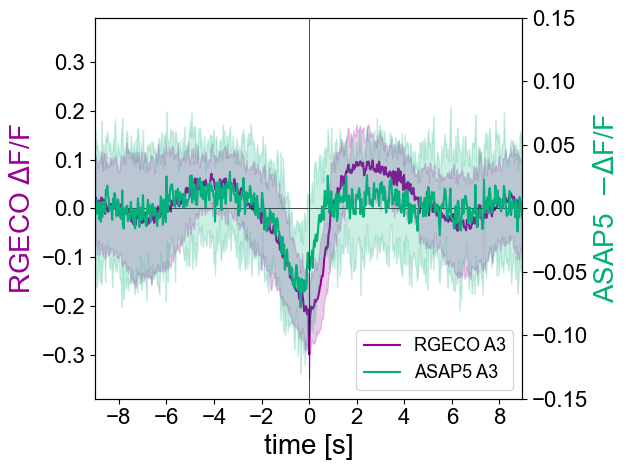

In [3]:
#Fig 2C
# loading backward wave form data of RGECO and ASAP5 of A02l in A3 segemnt
files = glob.glob('../data/Fig2/Fig2C_data/*.h5')
#iinterlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.03
time=np.arange(-300,300)*dt
RGECO_traces=[]
ASAP_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        #lienarly interpolate the traces
        fitted_ASAP = ip1(data['time'][i], data['ASAP'][i]) 
        fitted_RGECO= ip1(data['time'][i], data['RGECO'][i])
        ASAP_traces.append(fitted_ASAP(time))
        RGECO_traces.append(fitted_RGECO(time))
    data.close()
ASAP_traces=np.array(ASAP_traces)
RGECO_traces=np.array(RGECO_traces)
#plot mean traces
plt.rcParams["font.family"] = "Arial"
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, RGECO_traces.mean(axis=0), c=(153/255,0, 153/255), label='RGECO A3')
ax1.fill_between(time, RGECO_traces.mean(axis=0)+np.std(RGECO_traces, axis=0), 
                 RGECO_traces.mean(axis=0)-np.std(RGECO_traces, axis=0), color=(153/255,0, 153/255), alpha=0.2)
ax2 = ax1.twinx()
ax2.plot(time, -ASAP_traces.mean(axis=0), c=(3/255,175/255,122/255), label='ASAP5 A3')
ax2.fill_between(time, -ASAP_traces.mean(axis=0)+np.std(ASAP_traces, axis=0), 
                 -ASAP_traces.mean(axis=0)-np.std(ASAP_traces, axis=0), color=(3/255,175/255,122/255), alpha=0.2)
ax1.axhline(0, c='k', lw=0.5)
ax2.axvline(0, c='k', lw=0.5)
plt.xlim(time[0],time[-1])

RGECO_min=np.min(RGECO_traces.mean(axis=0)-np.std(RGECO_traces, axis=0))
ASAP_max=np.max(ASAP_traces.mean(axis=0)+np.std(ASAP_traces, axis=0))
ax1.set_ylim(RGECO_min-0.05,-RGECO_min+0.05)
ax2.set_ylim(-ASAP_max-0.02,ASAP_max+0.02)
plt.setp(ax1.get_xticklabels(), fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=16)
plt.setp(ax2.get_yticklabels(), fontsize=16)
ax1.set_xlabel('time [s]',fontsize=20)
ax1.set_ylabel(r'RGECO $\Delta$F/F', fontsize=20, c=(153/255,0, 153/255))
ax2.set_ylabel(r'ASAP5  $-\Delta$F/F', fontsize=20, c=(3/255,175/255,122/255))

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right', fontsize=13)
ax1.set_ylim(-0.39,0.39)
ax2.set_ylim(-0.15,0.15)
plt.tight_layout()
plt.savefig('figures/Fig2C.svg')

Figures 2D-F

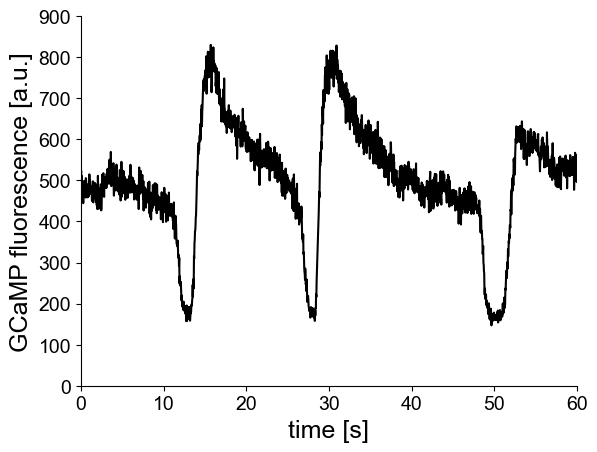

In [4]:
#Fig 2D
traces=pd.read_csv('../data/Fig2/A02l_GCaMP/original_traces_sample5.csv')
plt.rcParams["font.family"] = "Arial"
plt.plot(traces['time']-11,traces['A02l_A3L'], color='k')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0,60)
plt.ylim(0,900)
plt.xlabel('time [s]', fontsize=18)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/Fig2D.svg')

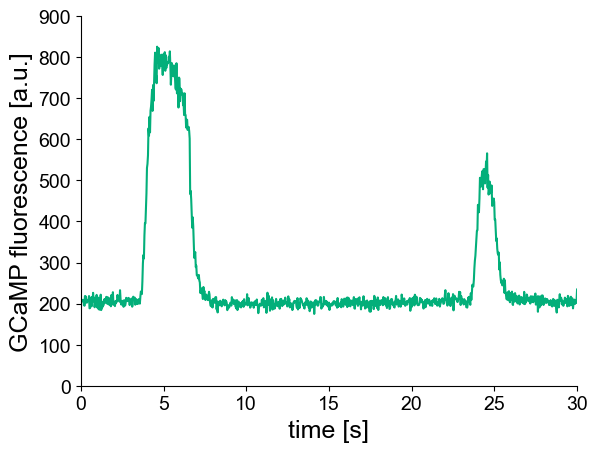

In [5]:
#Fig 2E
traces=pd.read_csv('../data/Fig2/A02l_GCaMP_kir/sample_3_original_traces.csv')
plt.rcParams["font.family"] = "Arial"
plt.plot(traces['time']-75,traces['A02l_A3L'], color=(3/255,175/255,122/255))
plt.xlabel('time [s]', fontsize=18)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0,900)
plt.xlim(0,30)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/Fig2E.svg')

In [6]:
#loading baseline and dip F data
baselline_w=np.load('../data/Fig2/A02l_GCaMP/baseline_w.npy')
baseline_kir=np.load('../data/Fig2/A02l_GCaMP_kir/baseline_kir.npy')
dip_F_w=np.load('../data/Fig2/A02l_GCaMP/minimum_F_dip_w/sample1.npy')
for i in range(2,6):
    dip_F_w=np.concatenate((dip_F_w,np.load('../data/Fig2/A02l_GCaMP/minimum_F_dip_w/sample'+str(i)+'.npy')),axis=0)

In [7]:
#statistial test
s1, p1=scipy.stats.brunnermunzel(baselline_w, baseline_kir)
s2, p2=scipy.stats.brunnermunzel(dip_F_w, baseline_kir)
corrected_p_values = smm.multipletests([p1, p2], alpha=0.05, method='holm')[1]
print("Corrected p-values:[baseline_w vs baseline_kir, dip_F_w vs baseline_kir]")
print(corrected_p_values)

Corrected p-values:[baseline_w vs baseline_kir, dip_F_w vs baseline_kir]
[2.19817748e-21 5.34757895e-17]


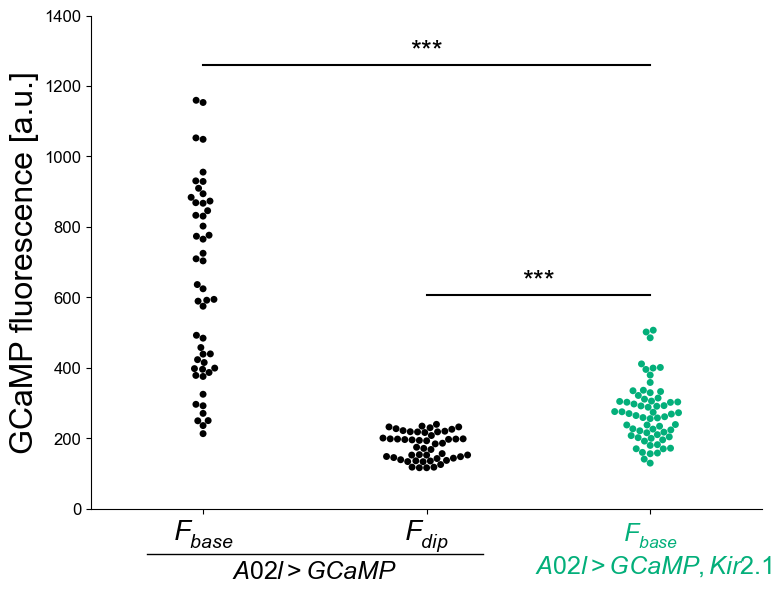

In [8]:
#Fig 2F
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['font.family'] = 'Arial'

sns.swarmplot(data=[baselline_w, dip_F_w, baseline_kir],palette=['k','k',(3/255,175/255,122/255)])
ax.tick_params(labelbottom=False, labeltop=False)
plt.ylim(0,1400)
plt.xlim(-0.5,2.5)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=23)
plt.yticks(fontsize=16)
ax.text(0, -120, "$F_{base}$", ha='center', va='bottom', color='k',  fontsize=20)
ax.text(1, -130, "$F_{dip}$", ha='center', va='bottom', color='k',  fontsize=20)
ax.text(2, -200, "$F_{base}$\n $\it{A02l>GCaMP, Kir2.1}$", ha='center', va='bottom', color=(3/255,175/255,122/255),  fontsize=18)
ax.plot([-0.25,-0.25,1.25,1.25],[-130,-130,-130,-130],lw=1, c='k', clip_on=False)
plt.text(0.5,-200,'$\it{A02l>GCaMP}$',ha='center', fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


x1, x2 = 0, 2
y, h, col = baselline_w.max() + 100, 0, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,  fontsize=20)
plt.yticks(fontsize=12)

x1, x2 = 1, 2
y, h, col = baseline_kir.max() + 100, 0, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,  fontsize=20)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('figures/Fig2F.svg')